In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
comum = pd.read_excel('./DadosEntrada.xlsx', sheet_name='Comum')
comum['Flag'] = comum['Flag'].str.rstrip('"')
comum['Flag'] = comum['Flag'].str.lstrip('"')
casos = pd.read_excel('./DadosEntrada.xlsx', sheet_name='Casos')
casos['Flag'] = casos['Flag'].str.rstrip('"')
casos['Flag'] = casos['Flag'].str.lstrip('"')
display(comum)
display(casos)

,Parâmetro,Flag,Valor
0,Membrane area,-membrane_area,2.592000e+01
1,Membrane thickness,-membrane_thickness,9.500000e-05
2,Membrane porosity,-membrane_porosity,8.500000e-01
3,Pore diameter,-pore_diameter,3.200000e-07
4,Feed channel height,-feed_channel_height,2.000000e-03
5,Cold channel height,-cold_channel_height,2.000000e-03
6,Channel width,-channel_width,4.000000e-01
7,Spacer porosity,-spacer_porosity,7.800000e-01
8,Gap spacer porosity,-gap_spacer_porosity,8.400000e-01
9,Air gap thickness,-air_gap_thickness,8.000000e-04


,Parâmetro,Flag,Caso 1,Caso 2,Caso 3,Caso 4,Caso 5,Caso 6,Caso 7,Caso 8,...,Caso 87,Caso 88,Caso 89,Caso 90,Caso 91,Caso 92,Caso 93,Caso 94,Caso 95,Caso 96
0,Feed mass flow rate,-feed_mass_flow_rate,0.112116,0.112116,0.112116,0.224231,0.224231,0.224231,0.308318,0.308318,...,0.347724,0.235857,0.235857,0.345924,0.345924,0.234604,0.234604,0.344086,0.355614,0.127983
1,Coolant mass flow rate,-cool_mass_flow_rate,0.112116,0.112116,0.112116,0.224231,0.224231,0.224231,0.308318,0.308318,...,0.347724,0.235857,0.235857,0.345924,0.345924,0.234604,0.234604,0.344086,0.355614,0.127983
2,Vacuum pressure,-vacuum_pressure,-81325.000000,-81325.000000,-81325.000000,-81325.000000,-81325.000000,-81325.000000,-81325.000000,-81325.000000,...,-81325.000000,-81325.000000,-81325.000000,-81325.000000,-81325.000000,-81325.000000,-81325.000000,-81325.000000,-81325.000000,-81325.000000
3,Feed temperature at the inlet,-entry_temperature_feed,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,70.000000,70.000000,70.000000,70.000000,80.000000,80.000000,80.000000,60.000000,80.000000
4,Coolant temperature at the inlet,-entry_temperature_cool,20.000000,25.000000,30.000000,20.000000,25.000000,30.000000,20.000000,25.000000,...,25.000000,20.000000,25.000000,20.000000,30.000000,20.000000,30.000000,25.000000,20.000000,20.000000
5,Feed salinity at the inlet,-entry_salinity_feed,0.035100,0.035100,0.035100,0.035100,0.035100,0.035100,0.035100,0.035100,...,0.210400,0.210400,0.210400,0.210400,0.210400,0.210400,0.210400,0.210400,0.245500,0.245500
6,Coolant salinity at the inlet,-entry_salinity_cool,0.035100,0.035100,0.035100,0.035100,0.035100,0.035100,0.035100,0.035100,...,0.210400,0.210400,0.210400,0.210400,0.210400,0.210400,0.210400,0.210400,0.245500,0.245500


In [3]:
num_casos = len(casos.columns) - 2

TCout = np.array([])
mass_flux = np.array([])

cmd_Comum = '../bin/vagmd '
for index, row in comum.iterrows():
    cmd_Comum += str(row['Flag']) + ' '
    if row['Parâmetro'] == 'Number of channels':
        cmd_Comum += str(int(row['Valor'])) + ' '
    else:
        cmd_Comum += str(row['Valor']) + ' '

for case in range(num_casos):
    
    cmd = cmd_Comum
    for index, row in casos.iterrows():
        cmd += str(row['Flag']) + ' '
        cmd += str(row[f'Caso {case+1}']) + ' '

    os.system(cmd)

    result = pd.read_csv('./results/report.csv')

    TCout = np.append(TCout, float(result[result['Desalination module:'] == 'Coolant temperature at the outlet of the module ='].iat[0, 1]))
    mass_flux = np.append(mass_flux, float(result[result['Desalination module:'] == 'Mass flux ='].iat[0, 1]))


In [4]:
Dado_experimental = pd.read_excel('./DadosEntrada.xlsx', sheet_name='Dado_experimental')
display(Dado_experimental)

,Mass flux,Coolant temperature at the outlet
0,0.70,57.2
1,0.62,57.8
2,0.50,58.0
3,1.38,55.3
4,1.27,56.8
...,...,...
91,0.77,72.9
92,0.45,73.9
93,1.36,72.5
94,0.41,53.7


In [5]:
mass_flux_exp = Dado_experimental.iloc[:,0].to_numpy(dtype=float)
print(np.size(mass_flux_exp))
TCout_exp= Dado_experimental.iloc[:,1].to_numpy(dtype=float)
print(TCout_exp)

96
[57.2 57.8 58.  55.3 56.8 57.2 55.4 55.3 56.7 66.3 66.6 65.4 65.5 66.6
 63.4 64.6 75.2 76.7 74.  75.2 74.8 73.5 72.8 75.1 57.4 56.6 56.1 57.1
 55.8 56.9 55.7 66.2 66.7 65.9 65.2 64.1 65.4 75.5 75.7 75.7 74.6 75.7
 74.  74.8 73.8 57.  55.8 56.7 56.6 55.5 66.  65.5 64.8 64.  65.1 75.5
 74.4 75.3 74.2 74.8 73.7 56.2 56.1 55.8 61.3 60.9 65.1 65.9 64.7 69.7
 69.3 75.3 74.7 72.8 55.1 56.  54.8 65.3 64.7 63.2 64.3 74.9 73.4 74.3
 72.9 54.7 54.4 64.  64.2 63.  63.8 72.9 73.9 72.5 53.7 74. ]


Text(0.5, 1.0, 'Outlet temperature [°C] (s = 0.0351 - 0.1052)')

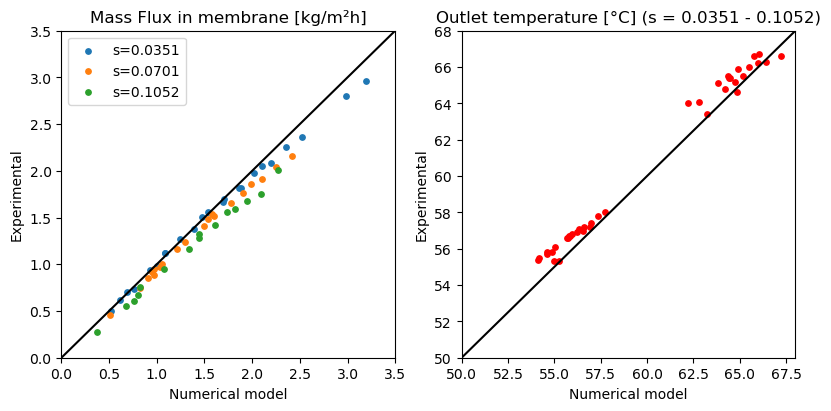

In [6]:
Tmin, Tmax = 50.0, 68.0
jmin, jmax = 0.0, 3.5

linej = np.linspace(jmin, jmax, 100)
lineT = np.linspace(Tmin, Tmax, 100)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8.0, 4.0), layout='constrained')

#axs[0].errorbar(mass_flux, mass_flux_exp, 0.1, fmt='o', capsize=2, markersize=3)
axs[0].scatter(mass_flux[:23], mass_flux_exp[:23], s=15, label='s=0.0351')
axs[0].scatter(mass_flux[24:44], mass_flux_exp[24:44], s=15, label='s=0.0701')
axs[0].scatter(mass_flux[45:60], mass_flux_exp[45:60], s=15, label='s=0.1052')
axs[0].plot(linej, linej, color='black')
axs[0].set_xlim(jmin, jmax)
axs[0].set_ylim(jmin, jmax)
axs[0].set_xlabel('Numerical model')
axs[0].set_ylabel('Experimental')
axs[0].set_title('Mass Flux in membrane [kg/m²h]')
axs[0].legend()

axs[1].scatter(TCout[:23], TCout_exp[:23], s=15, color = 'red')
axs[1].scatter(TCout[24:44], TCout_exp[24:44], s=15, color = 'red')
axs[1].scatter(TCout[45:60], TCout_exp[45:60], s=15, color = 'red')
axs[1].plot(lineT, lineT, color='black')
axs[1].set_xlim(Tmin, Tmax)
axs[1].set_ylim(Tmin, Tmax)
axs[1].set_xlabel('Numerical model')
axs[1].set_ylabel('Experimental')
axs[1].set_title('Outlet temperature [°C] (s = 0.0351 - 0.1052)')

Text(0.5, 1.0, 'Outlet temperature [°C] (s = 0.1403 - 0.2455)')

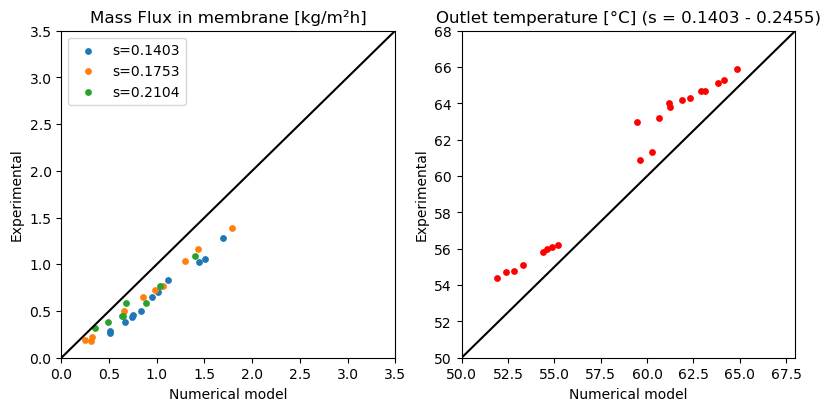

In [7]:
Tmin, Tmax = 50.0, 68.0
jmin, jmax = 0.0, 3.5

linej = np.linspace(jmin, jmax, 100)
lineT = np.linspace(Tmin, Tmax, 100)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8.0, 4.0), layout='constrained')

#axs[0].errorbar(mass_flux, mass_flux_exp, 0.1, fmt='o', capsize=2, markersize=3)
axs[0].scatter(mass_flux[61:73], mass_flux_exp[61:73], s=15, label='s=0.1403')
axs[0].scatter(mass_flux[74:84], mass_flux_exp[74:84], s=15, label='s=0.1753')
axs[0].scatter(mass_flux[85:93], mass_flux_exp[85:93], s=15, label='s=0.2104')
#axs[0].scatter(mass_flux[94:95], mass_flux_exp[94:95], s=15, label='s=0.2455')
axs[0].plot(linej, linej, color='black')
axs[0].set_xlim(jmin, jmax)
axs[0].set_ylim(jmin, jmax)
axs[0].set_xlabel('Numerical model')
axs[0].set_ylabel('Experimental')
axs[0].set_title('Mass Flux in membrane [kg/m²h]')
axs[0].legend()

axs[1].scatter(TCout[61:73], TCout_exp[61:73], color='red', s=15)
axs[1].scatter(TCout[74:84], TCout_exp[74:84], color='red', s=15)
axs[1].scatter(TCout[85:93], TCout_exp[85:93], color='red', s=15)
#axs[1].scatter(TCout[94:95], TCout_exp[94:95], color='red', s=15)
axs[1].plot(lineT, lineT, color='black')
axs[1].set_xlim(Tmin, Tmax)
axs[1].set_ylim(Tmin, Tmax)
axs[1].set_xlabel('Numerical model')
axs[1].set_ylabel('Experimental')
axs[1].set_title('Outlet temperature [°C] (s = 0.1403 - 0.2455)')

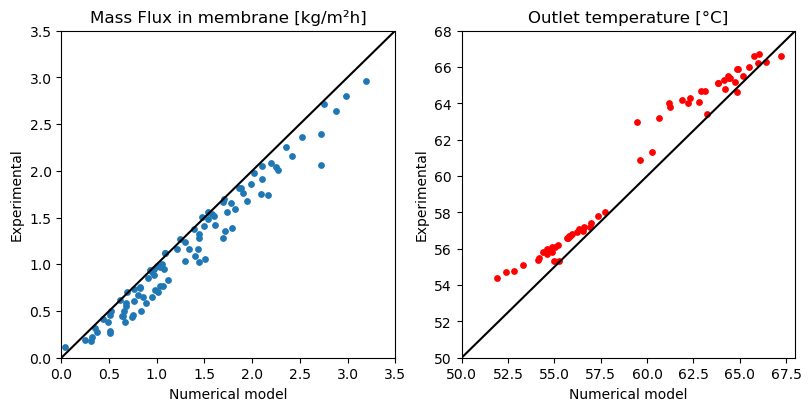

In [8]:
Tmin, Tmax = 50.0, 68.0
jmin, jmax = 0.0, 3.5

linej = np.linspace(jmin, jmax, 100)
lineT = np.linspace(Tmin, Tmax, 100)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8.0, 4.0), layout='constrained')

#axs[0].errorbar(mass_flux, mass_flux_exp, 0.1, fmt='o', capsize=2, markersize=3)
axs[0].scatter(mass_flux, mass_flux_exp, s=15)
axs[0].plot(linej, linej, color='black')
axs[0].set_xlim(jmin, jmax)
axs[0].set_ylim(jmin, jmax)
axs[0].set_xlabel('Numerical model')
axs[0].set_ylabel('Experimental')
axs[0].set_title('Mass Flux in membrane [kg/m²h]')

axs[1].scatter(TCout, TCout_exp, color='red', s=15)
axs[1].plot(lineT, lineT, color='black')
axs[1].set_xlim(Tmin, Tmax)
axs[1].set_ylim(Tmin, Tmax)
axs[1].set_xlabel('Numerical model')
axs[1].set_ylabel('Experimental')
axs[1].set_title('Outlet temperature [°C]')

plt.savefig('validacao.png',dpi=300)

In [ ]:
print(mass_flux[64])
print(mass_flux_exp[64])

In [ ]:
err = abs((mass_flux - mass_flux_exp) *100 / mass_flux_exp)
print(err)

In [ ]:
greater = np.where(err > 1)[0]
print(greater)
print("{} out of {}: {:.2f}%".format(len(greater),len(err),100*len(greater)/len(err)))

In [ ]:
np.sort(abs((mass_flux - mass_flux_exp)) *100 / mass_flux_exp)

In [ ]:
negative_positions = np.where(mass_flux < 0)[0]
print(negative_positions)

In [ ]:
np.sort(mass_flux)